#  Music Recommendation Systems

The number of songs which are available exceeds the listening
capacity of an individual in their lifetime. It is tedious for an
individual to sometimes choose from millions of songs and
there is also a good chance of missing out on songs which
could have been the apt for the occasion.
These days all effort and research is going in predicting the
kind of songs that a particular user will like, using their entire
song history. Here, people are trying to recommend songs
without taking in mood as a factor. A user may like party
songs as well as soothing songs, but recommending a song
in any one of these categories requires not just the history of
the songs the user like but also capturing the current mood
of the user. If a person is in the mood to listen to a party
song, he wouldn’t want the app to recommend a slow song,
which statistically, according to his history is apt but just not
suitable for the current mood.

So, we can solve this problem by asking one particular
question; given a song the user is currently listening to, which
song will the user like to listen to next?
This is the question we are trying to answer in this project.
We are trying to find similarity in the song being played by
the user with the list of songs available in our dataset by
using clustering techniques. After generating a playlist of
songs similar to the current song, we use popularity based
recommendation system to recommend the next song to the
user.

# Import Required Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving final.csv to final (1).csv


# Data Normalization

In [ ]:
df = pd.read_csv('final.csv')
df.shape
df.head()

,id,artist,name,popularity,preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,label
0,2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,99,NaN,0.764,0.320,11.0,-7.209,1.0,0.0546,0.8370,0.00000,0.0822,0.575,91.019,audio_features,189486.0,4.0,toplists
1,6WrI0LAC5M1Rw2MnX2ZvEg,Dua Lipa,Don't Start Now,95,https://p.scdn.co/mp3-preview/ed151225213380a4...,0.794,0.793,11.0,-4.521,0.0,0.0842,0.0125,0.00000,0.0952,0.677,123.941,audio_features,183290.0,4.0,toplists
2,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,94,NaN,0.704,0.225,6.0,-14.454,0.0,0.0994,0.9020,0.65700,0.1060,0.243,120.006,audio_features,245426.0,4.0,toplists
3,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,88,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,0.621,0.601,6.0,-5.616,0.0,0.1480,0.0522,0.00000,0.4600,0.457,116.735,audio_features,163636.0,5.0,toplists
4,4VginDwYTP2eaHJzO0QMjG,Post Malone,Circles,68,NaN,0.704,0.758,0.0,-3.537,1.0,0.0402,0.2330,0.00144,0.0924,0.534,120.003,audio_features,214907.0,4.0,toplists


In [ ]:
cols = ['artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','label']
non_categorical = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
categorical = ['artist','key','mode','time_signature','label']

# %ms = MinMaxScaler()
df[non_categorical] = df[non_categorical].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# df[non_categorical] = mms.fit_transform(df[non_categorical])
df.head()

,id,artist,name,popularity,preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,label
0,2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,99,NaN,0.782787,0.320,11.0,0.867161,1.0,0.060331,0.840361,0.00000,0.082863,0.585540,0.377600,audio_features,0.133347,4.0,toplists
1,6WrI0LAC5M1Rw2MnX2ZvEg,Dua Lipa,Don't Start Now,95,https://p.scdn.co/mp3-preview/ed151225213380a4...,0.813525,0.793,11.0,0.911314,0.0,0.093039,0.012550,0.00000,0.095968,0.689409,0.514180,audio_features,0.128744,4.0,toplists
2,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,94,NaN,0.721311,0.225,6.0,0.748152,0.0,0.109834,0.905622,0.65700,0.106855,0.247454,0.497855,audio_features,0.174910,4.0,toplists
3,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,88,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,0.636270,0.601,6.0,0.893328,0.0,0.163536,0.052410,0.00000,0.463710,0.465377,0.484285,audio_features,0.114141,5.0,toplists
4,4VginDwYTP2eaHJzO0QMjG,Post Malone,Circles,68,NaN,0.721311,0.758,0.0,0.927478,1.0,0.044420,0.233936,0.00144,0.093145,0.543788,0.497843,audio_features,0.152235,4.0,toplists


# Data Visualization

In [ ]:
corr = df[non_categorical].corr()
corr.style.background_gradient(cmap='coolwarm')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.320220,0.467422,0.208767,-0.358697,-0.329161,-0.125800,0.499286,0.018023,-0.060514
energy,0.320220,1.000000,0.785207,0.176132,-0.806444,-0.398532,0.225028,0.408443,0.273369,0.050700
loudness,0.467422,0.785207,1.000000,0.153372,-0.678513,-0.602274,0.090009,0.403360,0.252095,-0.004821
speechiness,0.208767,0.176132,0.153372,1.000000,-0.194587,-0.132311,0.108006,0.099672,0.090854,-0.064767
acousticness,-0.358697,-0.806444,-0.678513,-0.194587,1.000000,0.391480,-0.132127,-0.323875,-0.224542,-0.081183
instrumentalness,-0.329161,-0.398532,-0.602274,-0.132311,0.391480,1.000000,-0.022703,-0.393224,-0.140401,0.107339
liveness,-0.125800,0.225028,0.090009,0.108006,-0.132127,-0.022703,1.000000,-0.014101,0.035831,0.034142
valence,0.499286,0.408443,0.403360,0.099672,-0.323875,-0.393224,-0.014101,1.000000,0.143214,-0.128314
tempo,0.018023,0.273369,0.252095,0.090854,-0.224542,-0.140401,0.035831,0.143214,1.000000,-0.013498
duration_ms,-0.060514,0.050700,-0.004821,-0.064767,-0.081183,0.107339,0.034142,-0.128314,-0.013498,1.000000


In [ ]:
def cluster_plot(new_data):    
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(new_data)
    t = [30,40,50,60,70,80,90]
    label_color = [t[i] for i in pred_y]
    plt.figure(figsize = (7,7))
    plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=label_color, alpha=0.5,cmap='viridis') 
    plt.show()

def silhouette(new_data):
    kmeans = KMeans(random_state=0)
    visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='silhouette', timings=False)
    visualizer.fit(new_data)    
    visualizer.poof()

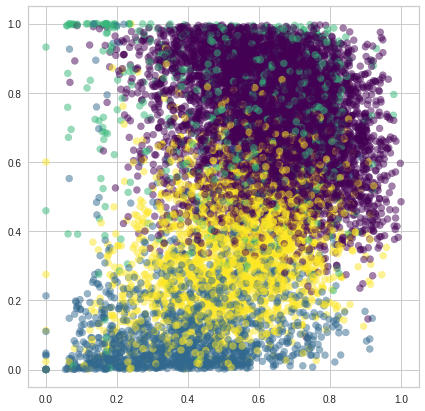

In [ ]:
cluster_plot(df[non_categorical])

# PCA ( Principal Component Analysis)

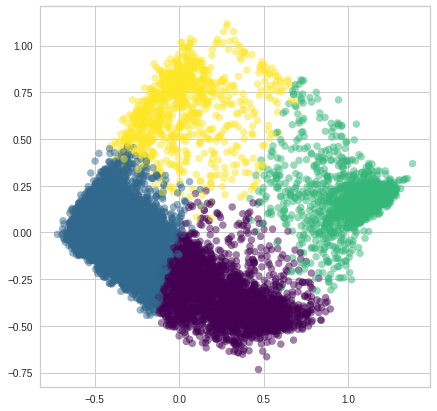

,0,1,2,3,4,5,6
0,0.256127,-0.521810,0.138744,-0.090820,0.127173,-0.112514,0.063021
1,-0.542197,0.000944,0.128033,-0.145677,0.016477,-0.030308,-0.002892
2,0.773966,0.020488,0.155532,-0.135814,0.148499,-0.179592,-0.091042
3,-0.339391,0.045402,-0.145966,0.077931,0.211139,0.173919,-0.092936
4,-0.325794,-0.065218,0.008516,-0.083025,-0.002374,-0.125450,0.046105


In [ ]:
pca = PCA(0.95)
data = df.drop_duplicates()
data = pca.fit_transform(data[non_categorical])
cluster_plot(pd.DataFrame(data))
pd.DataFrame(data).head()

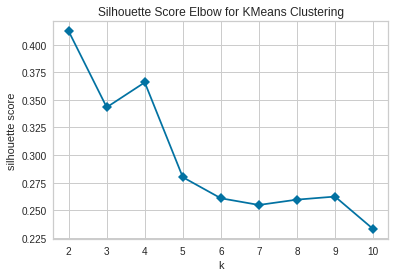

In [ ]:
data = pd.DataFrame(data)
silhouette(data)

#### From the above graph we can determine that the clustering algorithm requires four clusters

# Model Training

In [ ]:
def train(df_train):
    n = 1
    for _ in range(n):
        # train_df, test_df = train_test_split(df_train)
        km = KMeans(
            n_clusters=4, init='random',
            n_init=10, max_iter=1000, 
            tol=1e-04, random_state=0
        )
        y_km = km.fit(df_train)
        # km.labels_
        # km.predict(test_df)
    return km

def k_mean_distance(center_coordinates, data_coordiantes):
    summ=0
    mag=0
    for i in range(len(center_coordinates)):
        summ+=(center_coordinates[i]-data_coordiantes[i])**2
        mag+=(data_coordiantes[i])**2
    return (summ)*0.5

In [ ]:
km = train(data)
data = pd.DataFrame(data)
# pickle.dump(km, open('KMeans_Clustering', 'wb'))
data['label'] = km.labels_
data['artist'] = df.artist
data['name'] = df.name
data['preview'] = df.preview
data['popularity'] = df.popularity
data['type'] = df.label
data.head()

,0,1,2,3,4,5,6,label,artist,name,preview,popularity,type
0,0.256127,-0.521810,0.138744,-0.090820,0.127173,-0.112514,0.063021,1,Maroon 5,Memories,NaN,99,toplists
1,-0.542197,0.000944,0.128033,-0.145677,0.016477,-0.030308,-0.002892,3,Dua Lipa,Don't Start Now,https://p.scdn.co/mp3-preview/ed151225213380a4...,95,toplists
2,0.773966,0.020488,0.155532,-0.135814,0.148499,-0.179592,-0.091042,2,Billie Eilish,everything i wanted,NaN,94,toplists
3,-0.339391,0.045402,-0.145966,0.077931,0.211139,0.173919,-0.092936,3,Arizona Zervas,ROXANNE,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,88,toplists
4,-0.325794,-0.065218,0.008516,-0.083025,-0.002374,-0.125450,0.046105,3,Post Malone,Circles,NaN,68,toplists


# Generating Outcome

In [ ]:
def song_recommendation(song,data):
    arr = []
    dummy_df = data.loc[data['label']==song.label.values[0]]
    print(len(dummy_df.values))
    for i in range(len(dummy_df.values)):
        if(i>51): break
        dist = k_mean_distance(dummy_df.values[i][0:7],song.values[0][0:7])
        arr.append((
            dummy_df.values[i][11]/(dist+0.00000001)**2,
            dist,
            dummy_df.values[i][11],
            dummy_df.values[i][8],
            dummy_df.values[i][9],
            dummy_df.values[i][10],
            dummy_df.values[i][12]
        ))
    arr.sort()
    return arr

def song_print(song):
    print('='*200)
    print('Artist:  ', song.artist.values[0])
    print('Song Name:   ', song.name.values[0])
    print('Type:   ', song['type'].values[0])
    print('Preview link:   ', song.preview.values[0])
    print('='*200)

In [ ]:
song = data.loc[[2980]]
ans = song_recommendation(song,data)
song_print(song)
j=1
for i in ans[::-1]:
    print('Number:  ', j)
    print('Popularity/distance:  ',i[0])
    print('Artist:  ', i[3])
    print('Song Name:   ', i[4])
    print('Type:   ', i[6])
    print('Preview link:   ', i[5])
    print('-'*100)
    j+=1

2448
Artist:   Cigarettes After Sex
Song Name:    Falling In Love
Type:    decades
Preview link:    https://p.scdn.co/mp3-preview/b99534447943c33a206c56cffb0b63f818aa7e1e?cid=99f699c35c2d4667917d680d9134d27e
Number:   1
Popularity/distance:   137854.79055139178
Artist:   Lewis Capaldi
Song Name:    Someone You Loved
Type:    toplists
Preview link:    nan
----------------------------------------------------------------------------------------------------
Number:   2
Popularity/distance:   100415.84526848198
Artist:   Jhené Aiko
Song Name:    Triggered - Remix
Type:    toplists
Preview link:    nan
----------------------------------------------------------------------------------------------------
Number:   3
Popularity/distance:   32794.374449037416
Artist:   Bruno Major
Song Name:    Tapestry
Type:    toplists
Preview link:    https://p.scdn.co/mp3-preview/d56ef54b6fbcdfbfd361805c586520df4442dda2?cid=99f699c35c2d4667917d680d9134d27e
-----------------------------------------------------

# Model Evaluation

In [ ]:
data_eval = data.iloc[:,0:7]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f08cdbadb90>,
                     model=None)

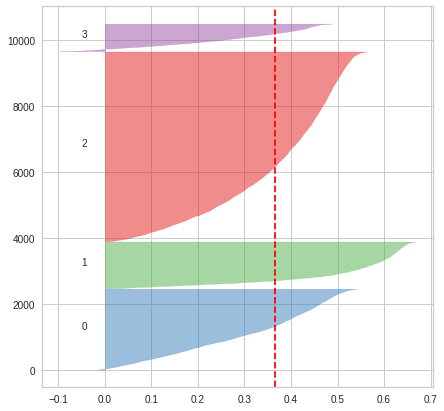

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
plt.figure(figsize = (7,7))
visualizer.fit(data_eval)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f08cda2ff50>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

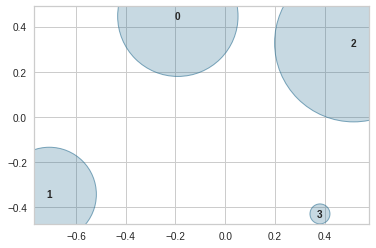

<Figure size 720x720 with 0 Axes>

In [27]:
from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = InterclusterDistance(model)
plt.figure(figsize = (10,10))
visualizer.fit(data_eval)        # Fit the data to the visualizer